# Study Summary

1. 建立多個子圖表 subplot()
2. 使用亂數, 資料集繪製圖表

1. 建立多個子圖表 subplot()
   figure內可以有多個subplot

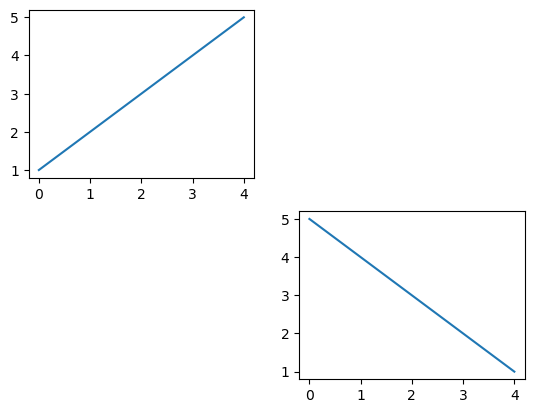

In [1]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = [5,4,3,2,1]
fig = plt.figure() #figure size
plt.subplot(221) #nrows 2、ncols 2、index 1
plt.plot(x)
plt.subplot(224) #nrows 2、ncols 2、index 4
plt.plot(y)
plt.show()

2. 使用亂數, 資料集繪製圖表

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#亂數
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

Text(0.5, 1.0, 'Cosine')

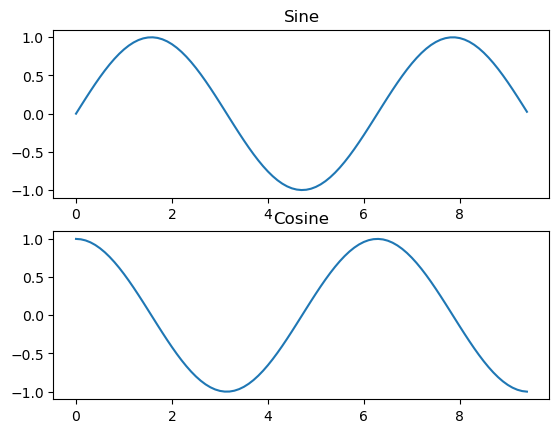

In [4]:
#雙格畫板_第一格
plt.subplot(2, 1, 1) #nrows 2、ncols 1、index 1
plt.plot(x, y_sin)
plt.title("Sine")

#雙格畫板_第二格
plt.subplot(2, 1, 2) #nrows 2、ncols 1、index 2
plt.plot(x, y_cos)
plt.title("Cosine")

3. 不用亂數產生dataset，用sklearn載入datasets

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

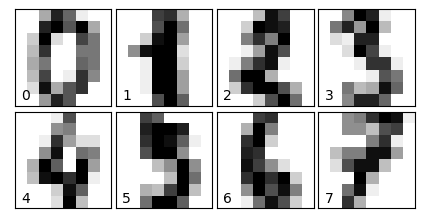

In [6]:
#載入 digits
digits = datasets.load_digits()

#設定圖形的大小(寬、高)
fig = plt.figure(figsize = (4, 2)) #Figure size 400x200 with 0 Axes

#子圖形間的間距
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#把前8個手寫數字顯示在子圖形
for i in range(8):
    #在2 x 4網格中第 i+1 個位置繪製子圖形，並且關掉座標軸刻度
    ax = fig.add_subplot(2, 4, i+1, xticks = [], yticks =[])
    #顯示圖形，色彩選擇灰階
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    #在左下角顯示目標值
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()

補充:
1. ax = fig.add_subplot(2, 4, i+1, xticks = [], yticks =[])
   add_subplot(2, 4, i+1) -> nrow2, ncolumn4, index i+1
   xticks = [], yticks =[] ->disable座標

2. imshow() 在圖表中繪製圖片

3. imshow(images, cmap = plt.cm.binary)

4. 參考網址: https://steam.oxxostudio.tw/category/python/example/matplotlib-subplot.html

4. subplot axes的運用: 在較大的圖中，放置較小的圖，則可以使用axes

Text(0.5, 0.5, 'axes([.2, .2, .3, .3])')

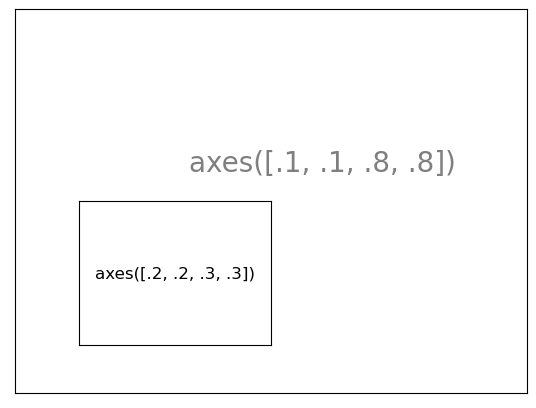

In [7]:
import matplotlib.pyplot as plt

#外框
plt.axes([.1, .1, .8, .8]) #傳入一個list，距離左邊10%, 距離下面10%，長寬各80%
plt.xticks([]), plt.yticks([])
plt.text(0.6, 0.6, 'axes([.1, .1, .8, .8])', ha = 'center', va = 'center', size = 20, alpha = 0.5) #ha 水平對齊; va垂直對齊

#內框
plt.axes([.2, .2, .3, .3]) #傳入一個list，距離左邊20%, 距離下面20%，長寬各30%
plt.xticks([]), plt.yticks([])
plt.text(.5, .5, 'axes([.2, .2, .3, .3])', ha = 'center', va = 'center', size = 12)

5. 等高線圖 contourf()顏色、contour()線條

5-1. meshgrid說明

[[1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]]


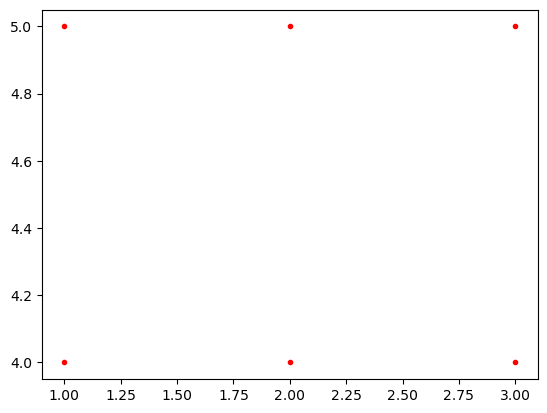

In [12]:
x = np.array([1,2,3])
y = np.array([4,5])
X, Y = np.meshgrid(x, y)
print(X), print(Y) #六組數字組合

#用圖呈現六組數字
plt.plot(X, Y, color = 'red', marker ='.', linestyle = "")

5-2. 等高線圖

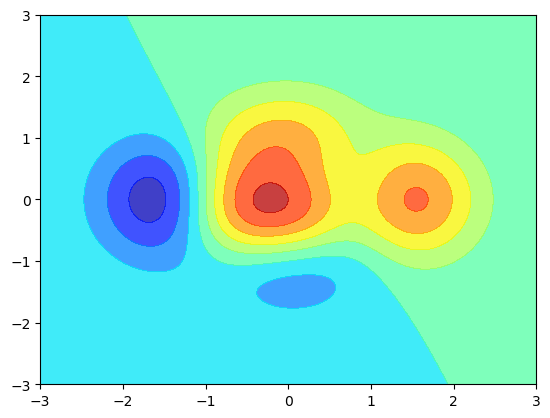

In [13]:
def f(x,y): return (1-x/2+x**5 + y**3)*np.exp(-x**2 - y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha = .75, cmap = 'jet')
#plt.contour(X, Y ,f(X, Y), 8, colors = 'black', linewidth = .5)
plt.show()

6. Axes3D

C:\Users\user\AppData\Local\Temp\ipykernel_19148\3972558769.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


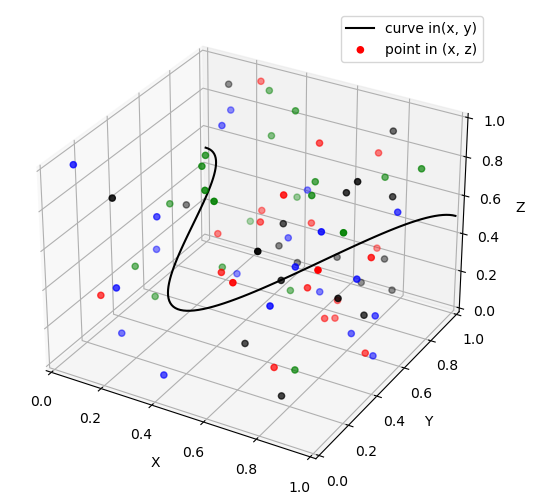

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#創建一個3D座標
fig = plt.figure()
ax = Axes3D(fig)

#利用x軸和y軸繪製sin曲線
x = np.linspace(0, 1, 100) #linspace創建等差陣列
y = np.cos(x * 2 * np.pi)/ 2 + 0.5

#通過zdir = z 將資料繪製在z軸, zs =0.5 將資料繪製在z=0.5的地方
ax.plot(x, y, zs=0.5, zdir = 'z,', color ='black', label = 'curve in(x, y)' )

#繪製散點數據(每個顏色20個2D點) 在X和Z軸
colors = ('r', 'g', 'b', 'k')
np.random.seed(19680801) #設置隨機函數複現

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
z = np.random.sample(20 * len(colors))

c_list = []
for i in colors:
    c_list.extend([i] * 20)

ax.scatter(x, y, z, zdir = 'y', c = c_list, label = 'point in (x, z)')

#設置圖例
ax.legend()
#限制軸的範圍
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
#軸添加標籤
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Homework

1. 軸圖: 較大的圖中放置較小的圖，繪製四個往右上的圖 (使用 tick)
2. 條型圖: 呈現兩個維度的資料(添加紅色條形標籤重現右側的圖形)

1. 較大的圖中放置較小的圖，繪製四個往右上的圖

Text(0.5, 0.1, 'axes = [0.3, 0.3, .3, .3]')

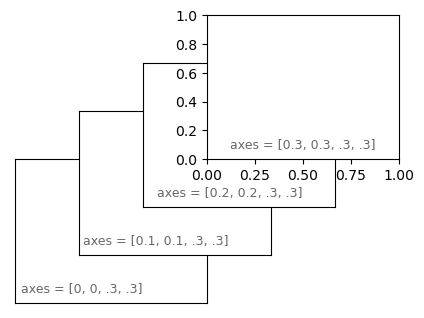

In [57]:
import matplotlib.pyplot as plt

#圖一
plt.axes([0, 0, .3, .3])
plt.xticks([]), plt.yticks([])
plt.text(0.35, 0.1, 'axes = [0, 0, .3, .3]', ha = 'center', va = 'center', size = 9, alpha = 0.6)
#圖二
plt.axes([0.1, 0.1, .3, .3])
plt.xticks([]), plt.yticks([])
plt.text(0.4, 0.1, 'axes = [0.1, 0.1, .3, .3]', ha = 'center', va = 'center', size = 9, alpha = 0.6)
#圖三
plt.axes([0.2, 0.2, .3, .3])
plt.xticks([]), plt.yticks([])
plt.text(0.45, 0.1, 'axes = [0.2, 0.2, .3, .3]', ha = 'center', va = 'center', size = 9, alpha = 0.6)
#圖四
plt.axes([0.3, 0.3, .3, .3])
plt.text(0.5, 0.1, 'axes = [0.3, 0.3, .3, .3]', ha = 'center', va = 'center', size = 9, alpha = 0.6)

2. 條型圖: 呈現兩個維度的資料(添加紅色條形標籤重現右側的圖形)

TypeError: only size-1 arrays can be converted to Python scalars

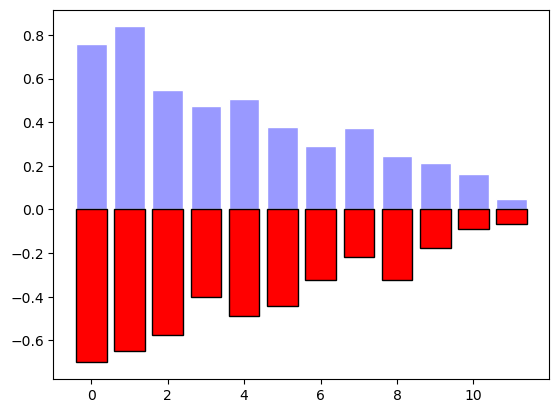

In [73]:
import numpy as np
import matplotlib.pyplot as plt

n = 12
x = np.arange(n)

#給定數學運算式
Y1 = (1-x/float(n)) * np.random.uniform(.5, 1, n)
Y2 = (1-x/float(n)) * np.random.uniform(.5, 1, n)

#指定上半部，給bar顏色，邊界顏色
plt.bar(x, +Y1, facecolor = '#9999ff', edgecolor = 'white')
plt.bar(x, -Y2, facecolor = 'red', edgecolor = 'black')

#設定繪圖圖示區間
for x,y in zip(X,Y):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')    

plt.ylim(-1.25, +1.25)
plt.show()